In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import MeanShift
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
# raw data
raw = pd.read_csv('owid-energy-data.csv')

df = raw[raw['year']>1969]

#A list of all of the countries included and all of the features 
countries = list(df['country'].unique())
all_features = list(df)

## Data Preprocessing 

In [3]:
energyshares = ['country','year','fossil_share_energy','low_carbon_share_energy','biofuel_share_energy', 'coal_share_energy', 'gas_share_energy', 'hydro_share_energy', 'nuclear_share_elec', 'oil_share_energy', 'renewables_share_energy', 'solar_share_energy', 'wind_share_energy' ]
energyShare = raw[energyshares]
energyShare = energyShare[energyShare['year'] == 2020] # clustering for most recent year
#print(energyShare.isna().sum().sum()) # 1369 NaN values

energyShare[energyShare.isna().any(axis=1)] # 189 rows with NaN 

energyShare = energyShare.dropna() 
energyShare.reset_index(level=0, inplace=True)

#Remove rows that are not countries including 'World', 'Africa', 'Europe', 'CIS', 'OECD', 'Non OECD' etc. 
energyShare = energyShare.drop([0,7, 11, 12, 20, 22, 23, 32])
#remove categorical data for clustering 
data = energyShare.drop(columns =['index', 'country', 'year'])

## Model 1: K-Means Clustering with all dimensions

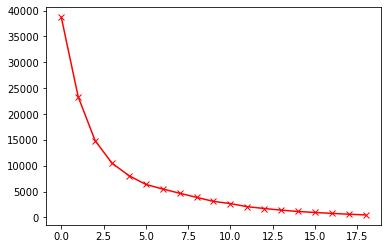

In [4]:
#KMeans for k=1-20 to determine best value for K using elbow method. 

scores = [] #list to store the inertia values for several values of K

for ii in range(1,20):
    kmeans = KMeans(n_clusters=ii)
    kmeans.fit(data)
    scores.append(kmeans.inertia_)
    
#Plotting using elbow rule - inertia vs K.
plt.plot(scores, '-rx')
plt.show()

In [5]:
kmeans_3 = KMeans(n_clusters=3)
kmeans_3.fit(data)
cluster_centroids = pd.DataFrame(kmeans_3.cluster_centers_, columns=data.columns)
cluster_centroids
energyShare['Three_Clusters'] = kmeans_3.predict(energyShare[energyshares[2:]])

kmeans_5 = KMeans(n_clusters=5)
kmeans_5.fit(data)
cluster_centroids = pd.DataFrame(kmeans_5.cluster_centers_, columns=data.columns)
cluster_centroids
energyShare['Five_Clusters'] = kmeans_5.predict(energyShare[energyshares[2:]])

label3 = pd.DataFrame(energyShare['Three_Clusters'].value_counts())
label5 = pd.DataFrame(energyShare['Five_Clusters'].value_counts())

print("Distribution of predicted labels for 3 clusters:")
print(label3)
print( )
print("Distribution of predicted labels for 5 clusters:")
print(label5)

Distribution of predicted labels for 3 clusters:
   Three_Clusters
2              13
1               6
0               6

Distribution of predicted labels for 5 clusters:
   Five_Clusters
2              6
4              6
1              5
3              5
0              3


There are 11 dimensions, so the clusters can not be visualized, rather they can be viewed numerically. 

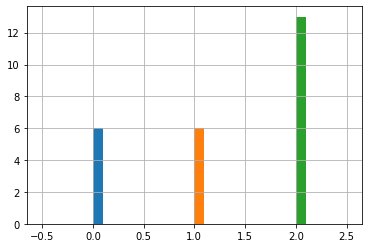

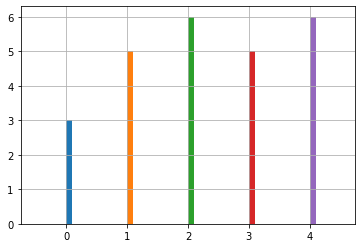

,fossil_share_energy,low_carbon_share_energy,biofuel_share_energy,coal_share_energy,gas_share_energy,hydro_share_energy,nuclear_share_elec,oil_share_energy,renewables_share_energy,solar_share_energy,wind_share_energy
0,51.933333,48.066667,2.511667,5.488500,14.423833,21.558167,24.677500,32.020833,34.000667,0.644667,5.488667
1,89.308167,10.691833,0.758500,45.622333,15.416833,4.023833,2.111000,28.268833,9.729833,1.528500,2.279333
2,80.337000,19.663000,1.067077,8.127846,33.048000,4.966462,11.604615,39.161385,14.920308,1.870769,4.786692


In [6]:
# Overall energy share distribution
plt.figure()
clustergraph_3 = energyShare[['country', 'Three_Clusters']].groupby('Three_Clusters')
plot_3 = clustergraph_3.Three_Clusters.hist()

plt.figure()
clustergraph_5 = energyShare[['country', 'Five_Clusters']].groupby('Five_Clusters')
plot_5 = clustergraph_5.Five_Clusters.hist()
plt.show()


# Displaying which countries by cluster. 
# For three Clusters 
cluster_0 = energyShare[energyShare['Three_Clusters'] == 0]
cluster_0 = pd.DataFrame(cluster_0['country'])
cluster_1 = energyShare[energyShare['Three_Clusters'] == 1]
cluster_1 = pd.DataFrame(cluster_1['country'])
cluster_2 = energyShare[energyShare['Three_Clusters'] == 2]
cluster_2 = pd.DataFrame(cluster_2['country'])

cluster_centroids = pd.DataFrame(kmeans_3.cluster_centers_, columns=data.columns)
cluster_centroids

###  KMeans: Three Clusters:
Cluster 0 = Austria, Brazil, Canada, Finland, France

Cluster 1 = Asia Pacific, Australia, China, India, Indonesia, Poland

Cluster 2 = Argentina, Belgium, Colombia, Germany, Italy, Mexico, Netherlands, Portugal, South Korea, Spain, Thailand, United Kingdom, United States

## KMeans Clustering with only 2 dimensions

[ 0  3 25 12 57 -1 21 49 50 89 90]


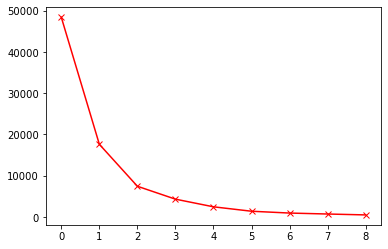

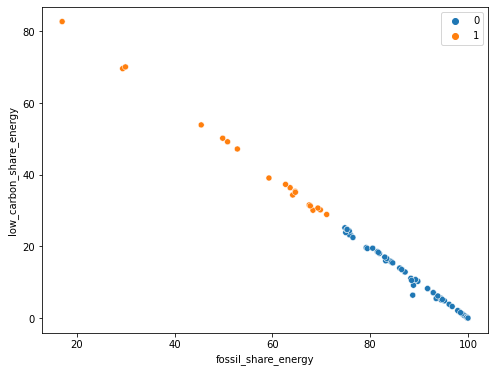

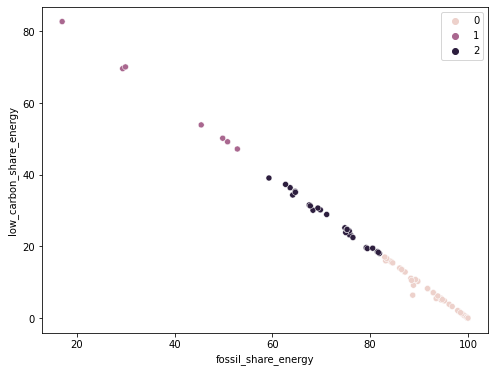

In [14]:
# doing k means clustering on only fossil_share and low_carbon_share
# Use raw data and drop only rows with Nan value in our columns of interest. 

fossilshare = raw[['country','year','fossil_share_energy','low_carbon_share_energy']]
fossilshare = fossilshare.dropna()
fossilshare = fossilshare[fossilshare['year'] == 2020] # 91 countries
fossilshare.reset_index(level=0, inplace=True)

#Determine index of rows to remove - those that are not countries. 
country = fossilshare['country']
index = pd.Index(country)
print(index.get_indexer(['Africa', 'Asia Pacific', 'Europe', 'CIS', 'OECD', 'Non OECD', 'Eastern Africa', 'Middle Africa', 'Middle East','Western Africa', 'World']))

fossilshare = fossilshare.drop([0, 3, 25, 12, 57, 21, 49, 50, 89, 90])
data = fossilshare[['fossil_share_energy','low_carbon_share_energy']]


#KMeans for k=1-10 to determine best value for K using elbow method. 
scores = [] #list to store the inertia values for several values of K

for ii in range(1,10):
    kmeans = KMeans(n_clusters=ii)
    kmeans.fit(data)
    scores.append(kmeans.inertia_)
    
#Plotting using elbow rule - inertia vs K.
plt.plot(scores, '-rx')
plt.show()

# Kmeans with 2 clusters based on plot. 
kmeans_2 = KMeans(n_clusters=2)
kmeans_2.fit(data)
cluster_centroids = pd.DataFrame(kmeans_2.cluster_centers_, columns=data.columns)
#fossilshare['Cluster'] = kmeans_2.predict(data[['fossil_share_energy','low_carbon_share_energy']])

# Plot the two-dimensional dataset following clustering 
cluster_labels = kmeans_2.labels_
fossilshare['cluster'] = cluster_labels.tolist()

plt.figure(figsize=(8,6))
sns.scatterplot(x=fossilshare['fossil_share_energy'], y=fossilshare['low_carbon_share_energy'], data=fossilshare, hue='cluster')
plt.legend()
plt.show()

# Kmeans with 3 clusters based on plot. 
kmeans_3 = KMeans(n_clusters=3)
kmeans_3.fit(data)
cluster_centroids = pd.DataFrame(kmeans_3.cluster_centers_, columns=data.columns)
#fossilshare['Cluster'] = kmeans_2.predict(data[['fossil_share_energy','low_carbon_share_energy']])

# Plot the two-dimensional dataset following clustering 
cluster_labels = kmeans_3.labels_
fossilshare['cluster'] = cluster_labels.tolist()

plt.figure(figsize=(8,6))
sns.scatterplot(x=fossilshare['fossil_share_energy'], y=fossilshare['low_carbon_share_energy'], data=fossilshare, hue='cluster')
plt.legend()
plt.show()

fossilshare.to_csv('/Users/rachelgodfrey/Documents/Northwestern/Quarter 3/DataSciencePipeline/ fossilshare.csv')



In the plot above we carry out clustering using only fossil share and low carbon share. There is a clear and expected trend between fossil share and low carbon share. As fossil share increases, the low carbon share decreases. There are some points that sit very far from the clusters, which are potential outliers. Kmeans however is not good at identifying outliers, other algorithms can be used to over come this. 

From the above scatter plots, 3 clusters looks to make more sense than 2. As with only 2 clusters, there was a large range of values contained in cluster 0. However, cluster 2 and three are less defined. 

In [15]:
cluster_0 = fossilshare[fossilshare['cluster'] == 0]
cluster_0 = pd.DataFrame(cluster_0['country'])
cluster_1 = fossilshare[fossilshare['cluster'] == 1]
cluster_1 = pd.DataFrame(cluster_1['country'])
cluster_2 = fossilshare[fossilshare['cluster'] == 2]
cluster_2 = pd.DataFrame(cluster_2['country'])

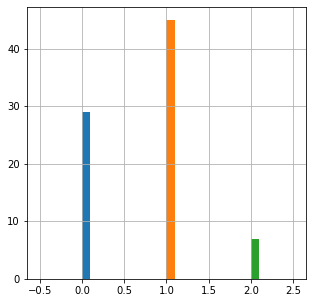

In [222]:
fossilshare[fossilshare['cluster'] == 0] # 29
fossilshare[fossilshare['cluster'] == 1] # 45
fossilshare[fossilshare['cluster'] == 2] # 7

clustergraph = fossilshare[['country', 'cluster']].groupby('cluster')
plot = clustergraph.cluster.hist(figsize=(5, 5))

In [250]:
kmeans.cluster_centers_

array([[88.05091667, 11.63841667],
       [49.71075   , 50.118     ],
       [65.60354545, 33.77036364],
       [99.2235625 ,  0.772     ],
       [29.628     , 69.8495    ],
       [75.10245455, 24.52836364],
       [93.36116667,  6.09891667],
       [82.21958333, 17.5075    ],
       [16.961     , 82.74      ]])

Brazil, Finland, France, Iceland, Norway, Sweden, Switzerland There are significantly more countries to look at after dropping NaN values when looking at only Fossil Fuel Share and Renewable Energy Share. This time, the three clusters have %72.32, %92.42, and %39.29 fossil fuel usage. Most of the countries/areas are in cluster 2, with a very high percentage of fossil fuel usage.

## Model 2 Mean-Shift Clustering 

In [148]:
meanshift = MeanShift().fit(energyShare[energyshares[2:]])
energyShare['MeanShiftCluster'] = meanshift.predict(energyShare[energyshares[2:]])

In [149]:
meanshift.cluster_centers_
# Mean shift instead created 4 cluster groups when estimating its own bandwith using sklearn.cluster.estimate_bandwidth
# However, the wide majority of countries are in cluster group 0, with 2 countries in group 1 and 1 country each in groups 2 and 3

array([[81.07119048, 18.92880952,  0.87219048, 12.91352381, 31.59290476,
         5.39638095, 11.81890476, 36.56480952, 14.05471429,  1.78538095,
         4.1512381 ],
       [50.806     , 49.194     ,  1.522     , 12.106     ,  6.428     ,
        12.773     , 33.891     , 32.272     , 30.127     ,  0.209     ,
         6.522     ],
       [49.809     , 50.191     ,  1.272     ,  2.224     , 16.818     ,
         6.255     , 67.175     , 30.766     , 14.086     ,  1.334     ,
         4.143     ],
       [29.916     , 70.084     ,  2.528     ,  3.403     ,  1.731     ,
        29.617     , 30.038     , 24.782     , 48.346     ,  0.427     ,
        11.336     ]])

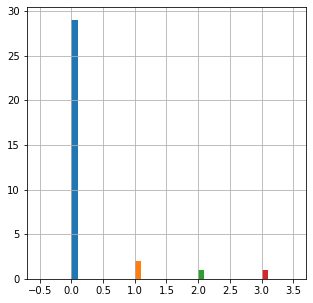

In [150]:
clustergraph = energyShare[['country', 'MeanShiftCluster']].groupby('MeanShiftCluster')
plot = clustergraph.MeanShiftCluster.hist(figsize=(5, 5))

In [223]:
# MEAN SHIFT FOR FOSSIL_SHARE ONLY
meancluster = MeanShift().fit(fossilshare[['fossil_share_energy','low_carbon_share_energy']])
fossilshare['MeanShiftCluster'] = meancluster.predict(fossilshare[['fossil_share_energy','low_carbon_share_energy']])
fossilshare

,index,country,year,fossil_share_energy,low_carbon_share_energy,cluster,MeanShiftCluster
1,483,Algeria,2020,99.746,0.254,1,0
2,847,Argentina,2020,84.106,15.894,1,1
4,1090,Australia,2020,89.626,10.374,1,0
5,1212,Austria,2020,63.608,36.392,0,2
6,1249,Azerbaijan,2020,98.131,1.869,1,0
...,...,...,...,...,...,...,...
84,16059,United Kingdom,2020,75.268,24.732,0,1
85,16181,United States,2020,81.663,18.337,0,1
86,16300,Uzbekistan,2020,96.764,3.236,1,0
87,16462,Venezuela,2020,80.495,19.505,0,1


In [158]:
meancluster.cluster_centers_
# similar to for all share columns, the meanshift clustering model created 4 cluster groups
# The majority of countries are placed into the first group 0, which has a %92.80 fossil share usage.
# As fossil_share_usage decreases within each cluster, the number of countries also decreases dramatically.

array([[92.79644,  6.9807 ],
       [51.6232 , 47.9118 ],
       [29.628  , 69.8495 ],
       [16.961  , 82.74   ]])

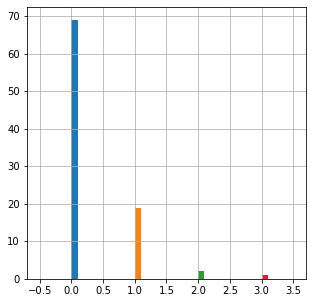

In [159]:
clustergraph = fossilshare[['country', 'MeanShiftCluster']].groupby('MeanShiftCluster')
plot = clustergraph.MeanShiftCluster.hist(figsize=(5, 5))

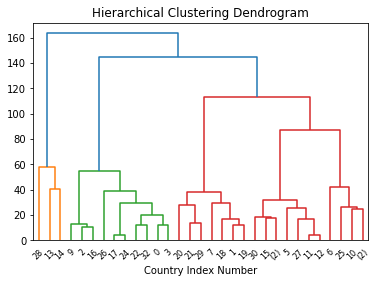

In [152]:
# MODEL 3: Hierarchical Agglomerative Clustering
# Dendrogram to estimate number of (optimal) clusters for data
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

X = energyShare[energyshares[2:]]

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=6)
plt.xlabel("Country Index Number")
plt.show()

In [153]:
agglomerative = AgglomerativeClustering(n_clusters=3) # optimal = 3 clusters
cluster_agg = agglomerative.fit(energyShare[energyshares[2:]]) 
energyShare['Cluster_Agg'] = agglomerative.fit_predict(energyShare[energyshares[2:]]) # predict fit
energyShare
# cluster 0 (agg)
energyShare[energyShare['Cluster_Agg'] == 0] # 20
# cluster 1 (agg)
energyShare[energyShare['Cluster_Agg'] == 1] # 3
# cluster 2 (agg)
energyShare[energyShare['Cluster_Agg'] == 2] # 10

,index,country,year,fossil_share_energy,low_carbon_share_energy,biofuel_share_energy,coal_share_energy,gas_share_energy,hydro_share_energy,nuclear_share_elec,oil_share_energy,renewables_share_energy,solar_share_energy,wind_share_energy,Cluster,MeanShiftCluster,Cluster_Agg
0,241,Africa,2020,90.408,9.592,0.015,22.105,29.632,6.814,1.466,38.671,8.849,0.593,1.041,2,0,2
2,969,Asia Pacific,2020,86.346,13.654,0.243,47.768,12.248,6.478,5.068,26.330,11.357,1.649,2.008,2,0,2
3,1090,Australia,2020,89.626,10.374,0.104,30.326,26.440,2.318,0.000,32.859,10.374,3.803,3.606,2,0,2
9,3486,China,2020,84.335,15.665,0.086,56.560,8.182,8.072,4.739,19.593,13.429,1.594,2.848,2,0,2
16,7372,India,2020,89.744,10.256,0.274,54.830,6.708,4.544,2.859,28.206,9.017,1.630,1.678,2,0,2
17,7494,Indonesia,2020,92.905,7.095,2.874,42.650,19.584,2.263,0.000,30.671,7.095,0.055,0.055,2,0,2
22,11392,Non-OECD,2020,86.450,13.550,0.474,36.511,21.896,7.369,5.165,28.042,11.397,1.046,1.722,2,0,2
24,12584,Poland,2020,92.893,7.107,0.970,41.600,19.339,0.468,0.000,31.954,7.107,0.440,3.481,2,0,2
26,14094,South Korea,2020,84.600,15.400,0.247,25.697,17.301,0.292,27.648,41.602,3.331,1.248,0.237,2,0,2
32,16852,World,2020,83.139,16.861,0.676,27.204,24.724,6.856,10.096,31.211,12.553,1.365,2.539,2,0,2


In [154]:
cluster_0 = energyShare[energyShare['Cluster_Agg'] == 0]
cluster_0.describe()

,index,year,fossil_share_energy,low_carbon_share_energy,biofuel_share_energy,coal_share_energy,gas_share_energy,hydro_share_energy,nuclear_share_elec,oil_share_energy,renewables_share_energy,solar_share_energy,wind_share_energy,Cluster,MeanShiftCluster,Cluster_Agg
count,20.00000,20.0,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0
mean,7865.30000,2020.0,77.403700,22.596300,1.327400,7.27970,32.979100,8.549950,11.070300,37.145050,18.058200,1.586750,4.450400,0.150000,0.050000,0.0
std,5268.37783,0.0,11.193574,11.193574,1.602474,5.15802,11.690656,9.418805,11.131778,5.913802,11.045537,1.189891,3.475978,0.366348,0.223607,0.0
min,847.00000,2020.0,52.815000,1.267000,0.000000,1.01300,9.629000,0.012000,0.000000,22.074000,1.074000,0.090000,0.015000,0.000000,0.000000,0.0
25%,3007.25000,2020.0,70.765500,14.866500,0.919500,3.12075,25.072750,1.233250,0.467250,34.403500,9.857750,0.541500,2.591500,0.000000,0.000000,0.0
50%,7148.00000,2020.0,75.515500,24.484500,1.103500,5.11750,29.448000,5.751500,9.330500,36.279000,18.103000,1.621000,3.919000,0.000000,0.000000,0.0
75%,12047.50000,2020.0,85.133500,29.234500,1.249000,12.29850,39.654500,9.423750,17.893250,42.644500,21.532000,2.092750,5.977000,0.000000,0.000000,0.0
max,16181.00000,2020.0,98.733000,47.185000,7.804000,15.22600,54.558000,29.349000,39.196000,46.657000,46.054000,3.932000,11.775000,1.000000,1.000000,0.0


In [155]:
cluster_1 = energyShare[energyShare['Cluster_Agg'] == 1]
cluster_1.describe()

,index,year,fossil_share_energy,low_carbon_share_energy,biofuel_share_energy,coal_share_energy,gas_share_energy,hydro_share_energy,nuclear_share_elec,oil_share_energy,renewables_share_energy,solar_share_energy,wind_share_energy,Cluster,MeanShiftCluster,Cluster_Agg
count,3.000000,3.0,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.0,3.0
mean,8681.333333,2020.0,43.510333,56.489667,1.77400,5.911000,8.325667,16.215000,43.701333,29.273333,30.853000,0.656667,7.333667,1.0,2.0,1.0
std,5096.635884,0.0,11.783587,11.783587,0.66484,5.397317,7.720443,12.055343,20.419872,3.961826,17.141535,0.596629,3.664548,0.0,1.0,0.0
min,5678.000000,2020.0,29.916000,49.194000,1.27200,2.224000,1.731000,6.255000,30.038000,24.782000,14.086000,0.209000,4.143000,1.0,1.0,1.0
25%,5739.000000,2020.0,39.862500,49.692500,1.39700,2.813500,4.079500,9.514000,31.964500,27.774000,22.106500,0.318000,5.332500,1.0,1.5,1.0
50%,5800.000000,2020.0,49.809000,50.191000,1.52200,3.403000,6.428000,12.773000,33.891000,30.766000,30.127000,0.427000,6.522000,1.0,2.0,1.0
75%,10183.000000,2020.0,50.307500,60.137500,2.02500,7.754500,11.623000,21.195000,50.533000,31.519000,39.236500,0.880500,8.929000,1.0,2.5,1.0
max,14566.000000,2020.0,50.806000,70.084000,2.52800,12.106000,16.818000,29.617000,67.175000,32.272000,48.346000,1.334000,11.336000,1.0,3.0,1.0


In [156]:
cluster_2 = energyShare[energyShare['Cluster_Agg'] == 2]
cluster_2.describe()

,index,year,fossil_share_energy,low_carbon_share_energy,biofuel_share_energy,coal_share_energy,gas_share_energy,hydro_share_energy,nuclear_share_elec,oil_share_energy,renewables_share_energy,solar_share_energy,wind_share_energy,Cluster,MeanShiftCluster,Cluster_Agg
count,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.0
mean,7557.400000,2020.0,88.044600,11.955400,0.596300,38.525100,18.605400,4.547400,5.704100,30.913900,9.450900,1.342300,1.921500,2.0,0.0,2.0
std,6004.315766,0.0,3.546896,3.546896,0.852465,12.186684,7.637927,2.972414,8.340774,6.183994,3.032579,1.023348,1.234347,0.0,0.0,0.0
min,241.000000,2020.0,83.139000,7.095000,0.015000,22.105000,6.708000,0.292000,0.000000,19.593000,3.331000,0.055000,0.055000,2.0,0.0,2.0
25%,1689.000000,2020.0,85.036500,9.758000,0.138750,27.984500,13.511250,2.276750,0.366500,28.083000,7.542500,0.706250,1.200250,2.0,0.0,2.0
50%,7433.000000,2020.0,88.038000,11.962000,0.260500,39.055500,19.461500,5.511000,3.799000,30.941000,9.695500,1.306500,1.865000,2.0,0.0,2.0
75%,12286.000000,2020.0,90.242000,14.963500,0.625500,46.488500,24.017000,6.845500,5.140750,32.632750,11.387000,1.621000,2.770750,2.0,0.0,2.0
max,16852.000000,2020.0,92.905000,16.861000,2.874000,56.560000,29.632000,8.072000,27.648000,41.602000,13.429000,3.803000,3.606000,2.0,0.0,2.0


'/Users/rachelgodfrey/Documents/Northwestern/Quarter 3/DataSciencePipeline/Group-C-Energy-Project-main'

In [ ]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

from datetime import datetime

df = pd.DataFrame(patients)
df['Datetime'] = pd.to_datetime(df['timestamp'], unit='s')

plt.figure(figsize=(8,6))
sns.scatterplot(x='latitude', y='longitude', data=df, hue='name')
plt.legend()
plt.show()

epsilon = 0.0018288 # Radial distance of 6 feet in km
model = DBSCAN(eps=epsilon, min_samples=2)
model.fit(df[['latitude', 'longitude']])

cluster_labels = model.labels_

df['cluster'] = cluster_labels.tolist()

plt.figure(figsize=(8,6))
sns.scatterplot(x='latitude', y='longitude', data=df, hue='cluster')
plt.legend()
plt.show()

print(df['cluster'].value_counts())



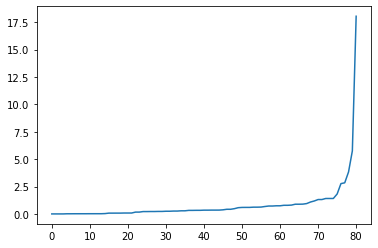

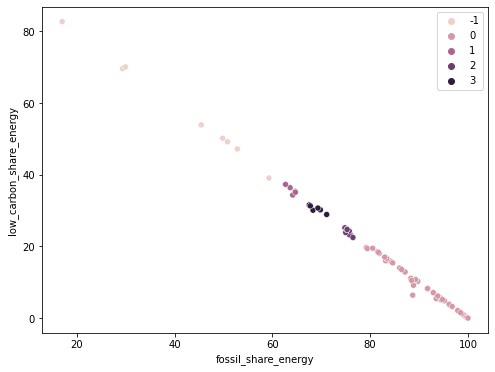

 0    52
 2    10
-1     8
 3     6
 1     5
Name: cluster_DBSCAN, dtype: int64


In [28]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

## Determine eps

X = fossilshare[['year', 'fossil_share_energy', 'low_carbon_share_energy']]
n = NearestNeighbors(n_neighbors=2)
n = n.fit(X)
dist,index = n.kneighbors(X)

distances = np.sort(dist, axis=0)
distances = distances[:,1]
plt.plot(distances)

#Use eps = 3

epsilon = 3.0 # Radial distance of 6 feet in km
model = DBSCAN(eps=epsilon, min_samples=5)
model.fit(fossilshare[['fossil_share_energy', 'low_carbon_share_energy']])

cluster_labels = model.labels_

fossilshare['cluster_DBSCAN'] = cluster_labels.tolist()

plt.figure(figsize=(8,6))
sns.scatterplot(x='fossil_share_energy', y='low_carbon_share_energy', data=fossilshare, hue='cluster_DBSCAN')
plt.legend()
plt.show()

print(fossilshare['cluster_DBSCAN'].value_counts())